In [434]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

 <h1>Please find my work and best finding in this Updated Assignment.</h1>

In [457]:
# I have applied optimization for all features means variables also applied outlier removal for heigher prices.
# during the optimization for all feature 2 clums(variables) became NuN, so I tried with droping them.
# I have chedk the correlation with variables and droped that have heigh positve and negiative corelative. But this trick also does not help much for me.
# I have searched also for best features then droped the less relavent features
# later i have searched for best parameters with keras tuner and save best model as well. 
# by these experiments I tried to improve the error matrix and model accuracy but i got les Sqr score. 


In [435]:
# I have not studied Data anyaltics course, So, this dataset is completely new for me
# loading the dataset 
df = pd.read_csv("Housing_Prices.csv")

In [436]:
# let's see what we have in the data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.00,2,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
5,7237550310,20140512T000000,1225000.00,4,4.50,5420,101930,1.00,0,0,...,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930
6,1321400060,20140627T000000,257500.00,3,2.25,1715,6819,2.00,0,0,...,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819
7,2008000270,20150115T000000,291850.00,3,1.50,1060,9711,1.00,0,0,...,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711
8,2414600126,20150415T000000,229500.00,3,1.00,1780,7470,1.00,0,0,...,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113
9,3793500160,20150312T000000,323000.00,3,2.50,1890,6560,2.00,0,0,...,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570


<p>We can see in the data that we have many yes/no fields and one field with multiple text categories. We have to convert all of these correctly into numeric format.</p>

In [437]:
# quickly check if we have missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<h3>Convert no/yes -columns into 0/1</h3>

In [439]:
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
# from sklearn.preprocessing import LabelEncoder
# variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# encoder = LabelEncoder()
# df[variables] = df[variables].apply(encoder.fit_transform)

<h3>Convert text categories with multiple choices into multiple variables</h3>

In [440]:
# when converting a category with multiple options
# into multiple variables, we can always remove the last one of them
# for the optimizations. See the ANN regression materials why this works 
# (the Rovaniemi/Oulu/Helsinki -example)
df = df.drop(["id", "date", "long", "lat","zipcode", "waterfront","yr_renovated"], axis=1)
 # df = df.drop(["id", "date","floors","bedrooms"], axis=1)

In [441]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,231300.00,2,1.00,1180,5650,1.00,0,3,7,1180,0,1955,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,0,3,7,2170,400,1951,1690,7639
2,180000.00,2,1.00,770,10000,1.00,0,3,6,770,0,1933,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,0,5,7,1050,910,1965,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,0,3,8,1680,0,1987,1800,7503
5,1225000.00,4,4.50,5420,101930,1.00,0,3,11,3890,1530,2001,4760,101930
6,257500.00,3,2.25,1715,6819,2.00,0,3,7,1715,0,1995,2238,6819
7,291850.00,3,1.50,1060,9711,1.00,0,3,7,1060,0,1963,1650,9711
8,229500.00,3,1.00,1780,7470,1.00,0,3,7,1050,730,1960,1780,8113
9,323000.00,3,2.50,1890,6560,2.00,0,3,7,1890,0,2003,2390,7570


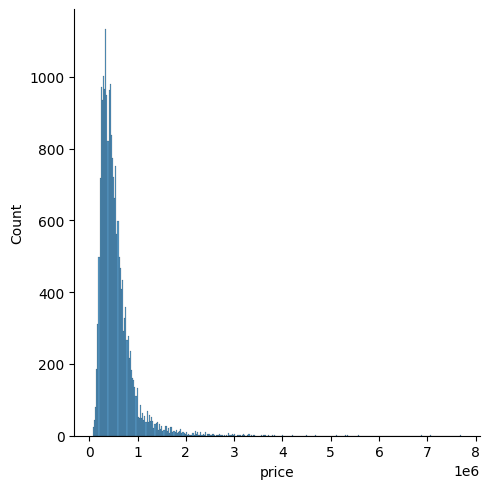

In [442]:
sns.displot(df["price"])
#price varialble is right skewed and there is pick so we need to normalize it.

In [443]:
# version 1, SciPy, extreme outliers that go under -3 or over +3 in normal distribution
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# version 2, use quantiles
# this removes top 10% and bottom 10% from the distribution (extreme values)
# price is used as the variable. you can also use this for other variables, like area
df= df.query('price >= price.quantile(q=0.01) and price < price.quantile(q=0.93)')

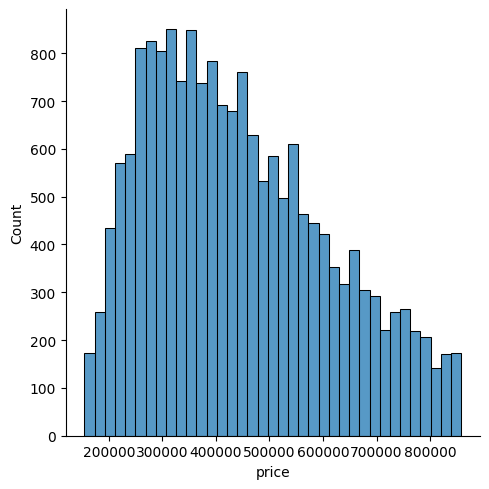

In [444]:
sns.displot(df["price"])
# lets check the price disturibuation after normaliztion, now its seems more clsoed normal.

In [445]:
df.info()
#with normalization the varialble price, we have lost the data around 2000.

<class 'pandas.core.frame.DataFrame'>
Index: 18061 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18061 non-null  float64
 1   bedrooms       18061 non-null  int64  
 2   bathrooms      18061 non-null  float64
 3   sqft_living    18061 non-null  int64  
 4   sqft_lot       18061 non-null  int64  
 5   floors         18061 non-null  float64
 6   view           18061 non-null  int64  
 7   condition      18061 non-null  int64  
 8   grade          18061 non-null  int64  
 9   sqft_above     18061 non-null  int64  
 10  sqft_basement  18061 non-null  int64  
 11  yr_built       18061 non-null  int64  
 12  sqft_living15  18061 non-null  int64  
 13  sqft_lot15     18061 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.1 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.00,0.25,0.38,0.54,0.08,0.24,0.15,0.02,0.56,0.45,0.19,0.04,0.49,0.07
bedrooms,0.25,1.00,0.47,0.61,0.10,0.14,0.02,0.02,0.29,0.47,0.27,0.17,0.39,0.10
bathrooms,0.38,0.47,1.00,0.69,0.05,0.51,0.04,-0.16,0.58,0.61,0.18,0.58,0.51,0.05
sqft_living,0.54,0.61,0.69,1.00,0.22,0.32,0.09,-0.09,0.65,0.84,0.34,0.36,0.72,0.22
sqft_lot,0.08,0.10,0.05,0.22,1.00,-0.11,0.03,0.05,0.11,0.19,0.05,0.02,0.25,0.82
floors,0.24,0.14,0.51,0.32,-0.11,1.00,-0.03,-0.30,0.46,0.53,-0.33,0.53,0.26,-0.11
view,0.15,0.02,0.04,0.09,0.03,-0.03,1.00,0.03,0.07,0.02,0.13,-0.07,0.11,0.02
condition,0.02,0.02,-0.16,-0.09,0.05,-0.30,0.03,1.00,-0.20,-0.19,0.18,-0.36,-0.14,0.05
grade,0.56,0.29,0.58,0.65,0.11,0.46,0.07,-0.20,1.00,0.66,0.02,0.51,0.64,0.13
sqft_above,0.45,0.47,0.61,0.84,0.19,0.53,0.02,-0.19,0.66,1.00,-0.23,0.47,0.71,0.20


<Axes: >

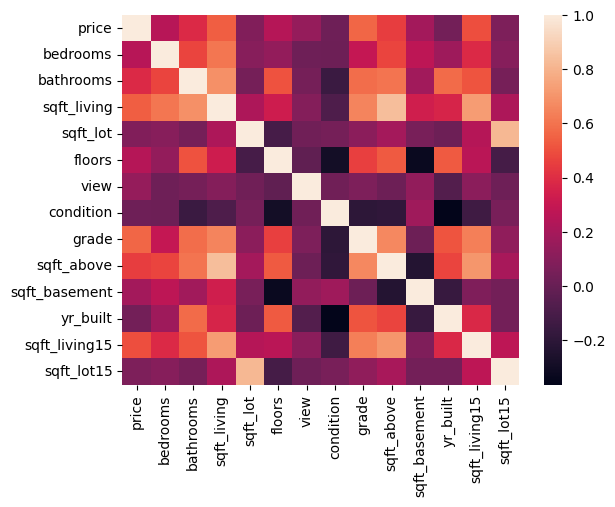

In [446]:
corr = df.corr()
display(corr)
sns.heatmap(corr)

In [447]:
df = df.drop(["sqft_above", "condition", "sqft_basement","view","sqft_lot15","sqft_lot"], axis =1)

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built,sqft_living15
price,1.00,0.25,0.38,0.54,0.24,0.56,0.04,0.49
bedrooms,0.25,1.00,0.47,0.61,0.14,0.29,0.17,0.39
bathrooms,0.38,0.47,1.00,0.69,0.51,0.58,0.58,0.51
sqft_living,0.54,0.61,0.69,1.00,0.32,0.65,0.36,0.72
floors,0.24,0.14,0.51,0.32,1.00,0.46,0.53,0.26
grade,0.56,0.29,0.58,0.65,0.46,1.00,0.51,0.64
yr_built,0.04,0.17,0.58,0.36,0.53,0.51,1.00,0.38
sqft_living15,0.49,0.39,0.51,0.72,0.26,0.64,0.38,1.00


<Axes: >

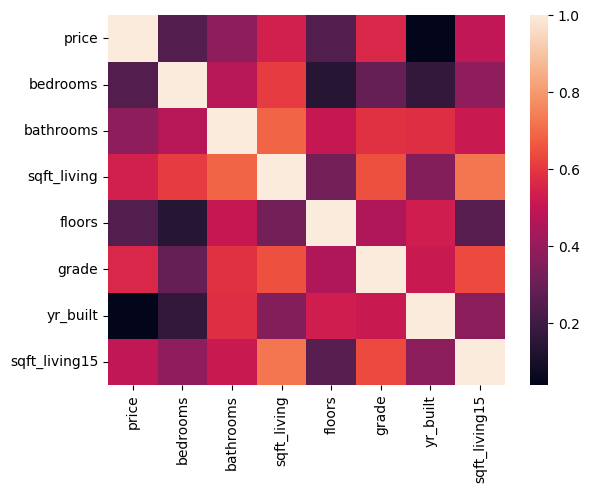

In [448]:
corr = df.corr()
display(corr)
sns.heatmap(corr)

In [449]:
# printing out the column names for easier copying for X/y
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade',
       'yr_built', 'sqft_living15'],
      dtype='object')

<h3>X/y -variables</h3>

In [450]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
# in this case, everything else except the amount_paid
#X = df[["bathrooms","sqft_living","sqft_lot",
 #      'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
  #     'yr_renovated',"sqft_living15",  "waterfront","sqft_lot15", "long", "lat","zipcode"]]
# have only the target variable here (dependent variable)
# in this case, amount_paid => how big is the electricity bill
X = df.drop("price", axis =1)
y = df['price']

In [451]:
# pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
#ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
#feat_importances = pd.Series(ranks, X.columns)
#feat_importances.plot(kind='barh')

# how to interpret -> low score means the effect of this field is not large in the dataset
# => typically means other columns in the dataset have similar correlations, 
# therefore making this particular column not so useful since other columns 
# already fill this role for this correlation

# Fisher's score studies the variance of the data -> statistical significance

In [452]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
2,sqft_living,1815107.07
6,sqft_living15,1145574.78
5,yr_built,1520.41
1,bathrooms,1113.67
4,grade,899.91
0,bedrooms,861.02
3,floors,852.79


<h3>Train/test/validation -split</h3>

In [453]:
# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.
# if you want to split the test set into two for a validation set too, try this trick:

# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [454]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 12642
Test data amount: 2710
Validation data amount: 2709


In [433]:
# pip install keras-tuner
import keras_tuner

def build_model(hp):
    # iniatlize sequential test neural network
    model = keras.Sequential()

    # first layer, batch normalization + input shape, same as in typical neural network
    model.add(layers.BatchNormalization(input_shape=(len(X.columns),)),)
    
    # add the first actual layer including the regularizer
    model.add(
        layers.Dense(
            # Tune number of units separately.
            units=hp.Int(f"units_0", min_value=4, max_value=32, step=2),
            activation=hp.Choice("activation", ["relu"]),
            kernel_regularizer=keras.regularizers.l1(l1=0.1)
        )
    )
        
    # automate a dropout layer
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.1))

    # try additional layers, 1 or 2 extra layers
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i + 1}", min_value=4, max_value=24, step=2),
                activation=hp.Choice("activation", ["relu"]),
            )
        )

    # output layer, only one node since this is regression
    model.add(layers.Dense(1))

    # automate learning rate tests
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    # compile the test neural network
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mse"
    )

    return model


# build the model + use RandomSearch to actually search the best options for our neural network
build_model(keras_tuner.HyperParameters())

# use val_loss as the objective, because regression tasks do not have accuracy
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=5,
    executions_per_trial=3,
    overwrite=True,
    directory="optimizations",
    project_name="regression1test",
)

# start searching
tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
26                |26                |units_0
relu              |relu              |activation
True              |True              |dropout
1                 |1                 |num_layers
24                |24                |units_1
0.00012426        |0.00012426        |lr



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 224350928896.0000 - val_loss: 224952926208.0000
Epoch 2/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 225616199680.0000 - val_loss: 224939868160.0000
Epoch 3/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 226806808576.0000 - val_loss: 224903823360.0000
Epoch 4/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 225434271744.0000 - val_loss: 224829194240.0000
Epoch 5/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 223424954368.0000 - val_loss: 224699940864.0000
Epoch 6/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 225706770432.0000 - val_loss: 224501170176.0000
Epoch 7/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 224939622400.0000 - val_loss: 224203128832.0000
Epoch 8/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 224349372416.0000 - val_loss: 223843221504.0000
Epoch 9/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 222199431168.0000 - val_loss: 223358189568.0000
Epo

KeyboardInterrupt: 

In [ ]:
# print out the result and suggestions
tuner.results_summary()

Results summary
Results in optimizations/regression1test
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 1 summary
Hyperparameters:
units_0: 32
activation: relu
dropout: False
num_layers: 2
units_1: 14
lr: 0.007101054997544238
units_2: 22
Score: 13871922176.0

Trial 4 summary
Hyperparameters:
units_0: 20
activation: relu
dropout: True
num_layers: 2
units_1: 18
lr: 0.001787365734000676
units_2: 18
Score: 14283455146.666666

Trial 2 summary
Hyperparameters:
units_0: 20
activation: relu
dropout: False
num_layers: 2
units_1: 16
lr: 0.0002583730885822532
units_2: 24
Score: 14350686890.666666

Trial 3 summary
Hyperparameters:
units_0: 12
activation: relu
dropout: False
num_layers: 2
units_1: 24
lr: 0.00020200820998132453
units_2: 12
Score: 14541901824.0

Trial 0 summary
Hyperparameters:
units_0: 16
activation: relu
dropout: True
num_layers: 2
units_1: 8
lr: 0.0001511139591393778
units_2: 4
Score: 87359804757.33333


In [ ]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │           462 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,099 (4.29 KB)

 Trainable params: 1,085 (4.24 KB)

 Non-trainable params: 14 (56.00 B)

<h1> First Approach</h1>

In [ ]:
# by using Sequential neural network model and changing the layers nodes along with manuplating the colum, I droping the colums like id, date and bedroom, bathrooms, time zoon, or tried to experiment with different colums as well, Unfortunatielly I get just only best R-squared value 0.71, in other experiments or manuplation sometime i got 6, 6.5, or 5 like that..
# model = keras.Sequential(
#     [
#         layers.Dense(8, activation="relu", input_shape=(variable_amount,)),
#         layers.Dense(32, activation="relu"),
#         layers.Dense(16, activation="relu"),
#         layers.Dense(1)
#     ]
# )

<h1> Second Approach & Optimization</h1>

In [ ]:
# I feel there is something wrong like underfitting and I could not get the best results, so i am changing my approach and applying optimization along with best checkpoint along with strategy drop layers and saving the best score 

# I got best score which is 0.85 by using modelCheckpoint and save the best score by changing in numbers of layers
# by wider the layers 

# I have then changed the nodes and layers also added the drop point before the last step, also applied L1, As a result I saw R-squared (7.5) also decresed and error matrics also increased 

# In the case of L2 and L1_L2 both cases result is around 7.8 by increasing epocs, or maunplating nodes layers, and also some changes with drop points, sometime i got error matrics decresed but R-Squared could never improved more then 7.8

# variable_amount = len(X.columns)
# mc = ModelCheckpoint('best_model_regression1.keras', monitor='val_loss', mode='min', save_best_only=True)
# callback_list = [mc]
# model = keras.Sequential(
#     [
#         layers.BatchNormalization(input_shape=(variable_amount,)),
#         layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),
#         layers.Dropout(0.1),
#         layers.Dense(128, activation="relu"),
#         layers.Dense(1)
#     ]
# )

# model.compile(optimizer='adam', loss='mse')
# model.summary()

<h1> Third Approach with optimization</h1>

In [ ]:

# with early stop approach
# surprisingly many time kernal atumatically stopped after 100 Epoch 
# but surprisingly val, los data frame surpisingly improved and error matrics also improved, mainly still r-squired could not much good

# # Implement EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(X_train, y_train, 
#                     epochs=800, 
#                     validation_data=(X_val, y_val), 
#                     callbacks=[early_stop], 
#                     batch_size=8)

<h3>Create neural network structure</h3>

<h1> The best model and layers combination I experiened it </h1>

In [455]:
variable_amount = len(X.columns)

from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint("best_regression_model.keras", monitor= "val_losss", mode="min", save_best_only=True)

calback_list = [mc]

model = keras.Sequential(
   [
       layers.BatchNormalization(input_shape=(variable_amount,)),
       layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
       layers.Dense(14, activation="relu"),
        layers.Dense(22, activation="relu"),
       layers.Dense(1)
   ]
)

optimal_learning_rate = 0.007101054997544238
model.compile(optimizer= keras.optimizers.Adam(learning_rate= optimal_learning_rate), loss='mse')
model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │           462 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 22)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,099 (4.29 KB)

 Trainable params: 1,085 (4.24 KB)

 Non-trainable params: 14 (56.00 B)

<h3>Train the neural network with our data</h3>

In [456]:

# using validation again for better metrics and optimization
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val), callbacks = calback_list)

Epoch 1/500
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 158129422336.0000 - val_loss: 19117844480.0000
Epoch 2/500
238/396 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 17001407488.0000

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_losss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 16765880320.0000 - val_loss: 14763262976.0000
Epoch 3/500
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 15402456064.0000 - val_loss: 14514193408.0000
Epoch 4/500
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 15523479552.0000 - val_loss: 15097030656.0000
Epoch 5/500
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 15677169664.0000 - val_loss: 14535452672.0000
Epoch 6/500
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 15378193408.0000 - val_loss: 14346951680.0000
Epoch 7/500
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 15565921280.0000 - val_loss: 14449603584.0000
Epoch 8/500
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 15172111360.0000 - val_loss: 14343678976.0000
Epoch 9/500
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 14556421120.0000 - val_loss: 14363198464.0000
Epoch 10/500
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 15034085376.0000 - val_loss: 14427509760.0000
Epoch 11/500
396/396 ━━━━━━━━━

<h3>Training metrics</h3>

<Axes: >

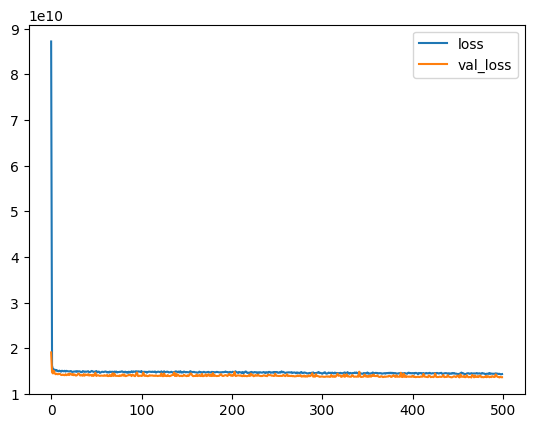

In [458]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [459]:
from keras.models import load_model
model = load_model("Best_Regression_Model.keras")

ValueError: File not found: filepath=Best_Regression_Model.keras. Please ensure the file is an accessible `.keras` zip file.

In [460]:
# compare test error values to training error values
# the model is often good when these error values are similar
# even if you training metrics above didn't overlap
# you might still get very close values in evaluation => more important

# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
13874485248.0

Train data evaluation:
13501349888.0


<h3>Make some test predictions to see what kind of mistakes the model makes</h3>

In [461]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,Test True Y,Model Predictions
0,650000.00,507353.31
1,365000.00,540750.50
2,215000.00,657060.62
3,830000.00,349573.09
4,315000.00,529220.56
...,...,...
2705,756000.00,634005.44
2706,245000.00,338787.81
2707,190000.00,265621.94
2708,419000.00,420305.44


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

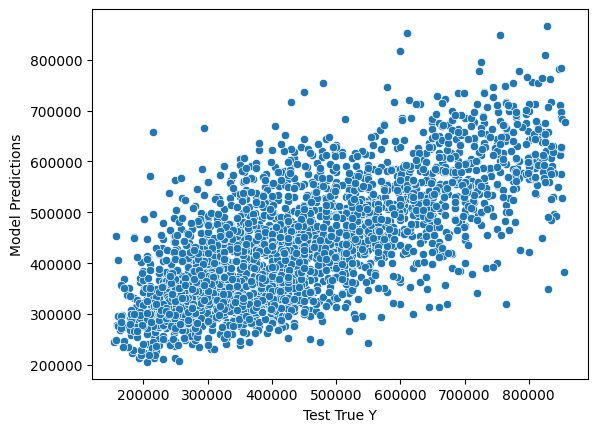

In [462]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

<h3>Regression error metrics</h3>

In [463]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
94236.87 $

MSE
13874486382.49 $^2

RMSE:
117790.01 $

R-squared:
0.52

Explained variance score:
0.52


/var/folders/gc/n9f0hqw521d0_z3nmf82zyrc0000gn/T/ipykernel_1937/3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


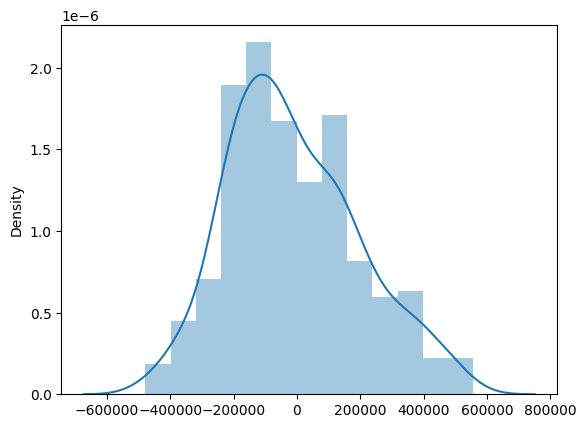

In [464]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

<h2>Lets' try the model in practice</h2>

In [ ]:
X.columns

Index(['bathrooms', 'sqft_living', 'sqft_lot', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'waterfront', 'sqft_lot15', 'long', 'lat', 'zipcode'],
      dtype='object')

In [ ]:
df.head()

,price,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,231300.00,1.00,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000.00,2.25,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000.00,1.00,770,10000,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000.00,3.00,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000.00,2.00,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [ ]:

tester_row = {
    'bathrooms': 2.0, 
    'sqft_living': 1680, 
    'sqft_lot': 8080,
    'view': 0,
    'condition': 3, 
    'grade': 8, 
    'sqft_above': 1680, 
    'sqft_basement': 0, 
    'yr_built': 1987,
    'yr_renovated': 3,
    'sqft_living15': 23, 
    'waterfront': 1,
    'sqft_lot15': 800,
    'lat': 47.37,
    'long': -122.03	,
    'zipcode': 9803    
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [ ]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this house:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Estimated price for this house:
1612803.25 $
----------------


In [ ]:
len(y_test)

3242